## Data Overview
The dataset contains 1000 entries and 10 columns. Here's summary of the columns:
1. Timestamp: Date and Time of the record
2. Temperature: Temperature in degree Celsius
3. Humidity: Humidity at time (in percentage)
4. Occupancy: Number of occupants in the building
5. HVACUsage: Whether HVAC(Heater, Vantilation, and Air Conditioning) is on or off.
6. LightingUsage: Whether lightining is on or off.
7. RenewableEnergy: Amount of energy from renewable resource (in KWh)
8. DayOfWeek: Day of the Week
9. Holiday: Whether day is holiday or not
10. Energy Consumption: Total energy consumption (in KWh)


In [48]:
import pandas as pd
import numpy as np

data=pd.read_csv('energy_consumption.csv')


In [50]:
data.info


<bound method DataFrame.info of            Timestamp  Temperature   Humidity  Occupancy HVACUsage  \
0      1/1/2022 0:00    25.139433  43.431581          5        On   
1      1/1/2022 1:00    27.731651  54.225919          1        On   
2      1/1/2022 2:00    28.704277  58.907658          2       Off   
3      1/1/2022 3:00    20.080469  50.371637          1       Off   
4      1/1/2022 4:00    23.097359  51.401421          9        On   
..               ...          ...        ...        ...       ...   
995  2/11/2022 11:00    28.619382  48.850160          5       Off   
996  2/11/2022 12:00    23.836647  47.256436          4       Off   
997  2/11/2022 13:00    23.005340  48.720501          6       Off   
998  2/11/2022 14:00    25.138365  31.306459          3        On   
999  2/11/2022 15:00    23.051165  42.615421          6       Off   

    LightingUsage  RenewableEnergy  DayOfWeek Holiday  EnergyConsumption  
0             Off         2.774699     Monday      No          7

In [52]:
data.head()

,Timestamp,Temperature,Humidity,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,1/1/2022 0:00,25.139433,43.431581,5,On,Off,2.774699,Monday,No,75.364373
1,1/1/2022 1:00,27.731651,54.225919,1,On,On,21.831384,Saturday,No,83.401855
2,1/1/2022 2:00,28.704277,58.907658,2,Off,Off,6.764672,Sunday,No,78.270888
3,1/1/2022 3:00,20.080469,50.371637,1,Off,On,8.623447,Wednesday,No,56.519850
4,1/1/2022 4:00,23.097359,51.401421,9,On,Off,3.071969,Friday,No,70.811732


In [54]:
data.dtypes

Timestamp             object
Temperature          float64
Humidity             float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object

## Conversion of timestamp to datetime


In [56]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [58]:

data['Hour']= data['Timestamp'].dt.hour
data['DayOfWeek']=data['Timestamp'].dt.dayofweek
data['Month']=data['Timestamp'].dt.month





In [60]:
## Changing categorical values to numerical values

data['HVACUsage']=data['HVACUsage'].apply(lambda x: 1 if x == 'On' else 0)
data['LightingUsage']=data['LightingUsage'].apply(lambda x: 1 if x == 'On' else 0)
data['Holiday']=data['Holiday'].apply(lambda x: 1 if x == 'Yes' else 0)


In [62]:
data.dropna(inplace=True)

In [64]:
#To verify null data sets
data.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
Hour                 0
Month                0
dtype: int64

In [66]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   Occupancy          1000 non-null   int64         
 4   HVACUsage          1000 non-null   int64         
 5   LightingUsage      1000 non-null   int64         
 6   RenewableEnergy    1000 non-null   float64       
 7   DayOfWeek          1000 non-null   int32         
 8   Holiday            1000 non-null   int64         
 9   EnergyConsumption  1000 non-null   float64       
 10  Hour               1000 non-null   int32         
 11  Month              1000 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(4)
memory usage: 82.2 KB


In [68]:
data.duplicated().sum()

0

In [70]:
data.describe()

,Timestamp,Temperature,Humidity,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Month
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2022-01-21 19:29:59.999999744,24.982026,45.395412,4.581000,0.492000,0.491000,15.132813,2.992000,0.467000,77.055873,11.436000,1.25600
min,2022-01-01 00:00:00,20.007565,30.015974,0.000000,0.000000,0.000000,0.006642,0.000000,0.000000,53.263278,0.000000,1.00000
25%,2022-01-11 09:45:00,22.645070,38.297722,2.000000,0.000000,0.000000,7.628385,1.000000,0.000000,71.544690,5.000000,1.00000
50%,2022-01-21 19:30:00,24.751637,45.972116,5.000000,0.000000,0.000000,15.072296,3.000000,0.000000,76.943696,11.000000,1.00000
75%,2022-02-01 05:15:00,27.418174,52.420066,7.000000,1.000000,1.000000,22.884064,5.000000,1.000000,82.921742,17.000000,2.00000
max,2022-02-11 15:00:00,29.998671,59.969085,9.000000,1.000000,1.000000,29.965327,6.000000,1.000000,99.201120,23.000000,2.00000
std,NaN,2.836850,8.518905,2.865598,0.500186,0.500169,8.745917,2.006979,0.499159,8.144112,6.913009,0.43664


## EDA ANALYSIS

In [72]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#To access correlation of selected data, we have created selected_features variable
selected_features = ['Temperature', 'Humidity', 'Occupancy', 'DayOfWeek','Hour', 'EnergyConsumption']

In [76]:
correlation =data[selected_features].corr()
correlation

,Temperature,Humidity,Occupancy,DayOfWeek,Hour,EnergyConsumption
Temperature,1.000000,-0.034032,-0.003490,0.028313,0.028976,0.696410
Humidity,-0.034032,1.000000,0.004766,-0.028783,-0.008521,-0.093583
Occupancy,-0.003490,0.004766,1.000000,-0.037308,0.054860,0.186580
DayOfWeek,0.028313,-0.028783,-0.037308,1.000000,-0.004654,0.060690
Hour,0.028976,-0.008521,0.054860,-0.004654,1.000000,0.007718
EnergyConsumption,0.696410,-0.093583,0.186580,0.060690,0.007718,1.000000


## Time Series Analysis: Energy Consumption Plot Over Time

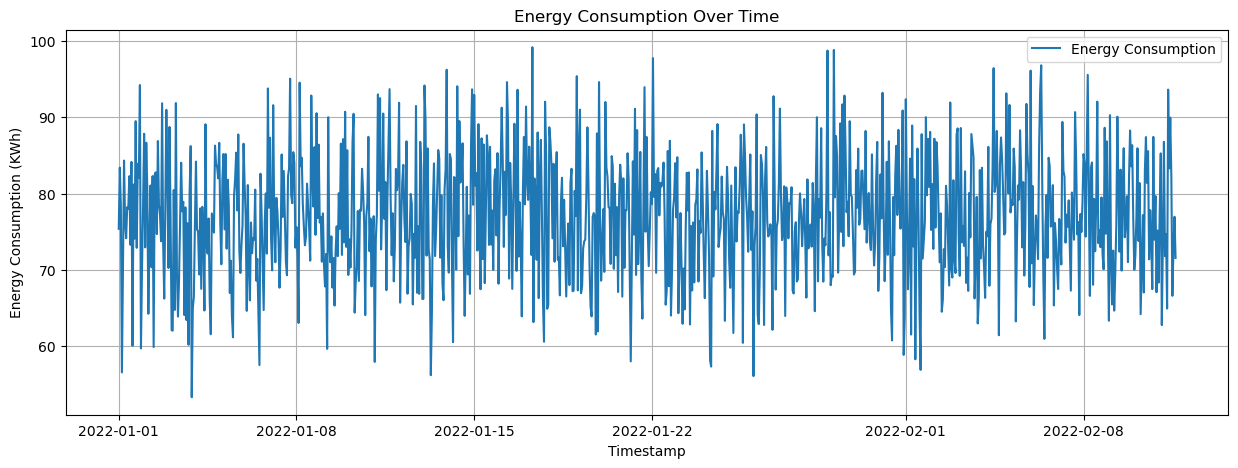

In [78]:
# Daily Pattern: Average Energy Consumption in Hour of Day
plt.figure(figsize=(15,5))
plt.plot(data['Timestamp'], data['EnergyConsumption'], label='Energy Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (KWh)')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


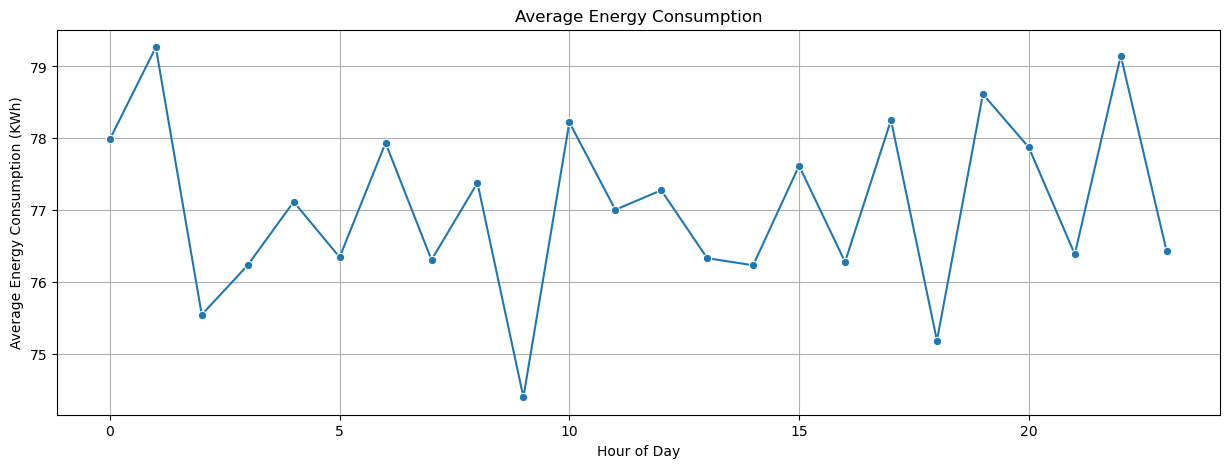

In [80]:
# Daily Pattern: Average Energy Consumption in Hour of Day
hourly_consumption = data.groupby('Hour')['EnergyConsumption'].mean()

plt.figure(figsize=(15,5))
sns.lineplot(x=hourly_consumption.index, y=hourly_consumption.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (KWh)')
plt.title('Average Energy Consumption')
plt.grid(True)
plt.show()

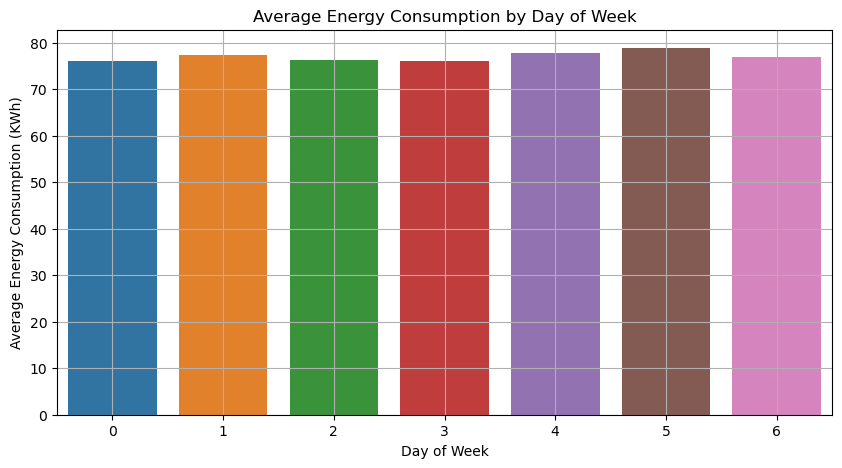

In [82]:
# Daily Pattern: Average Energy Consumption in Hour of Day
weekly_consumption = data.groupby('DayOfWeek')['EnergyConsumption'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=weekly_consumption.index, y=weekly_consumption.values)
plt.xlabel('Day of Week')
plt.ylabel('Average Energy Consumption (KWh)')
plt.title('Average Energy Consumption by Day of Week')
plt.grid(True)
plt.show()

## Visualization of correlation using heat map

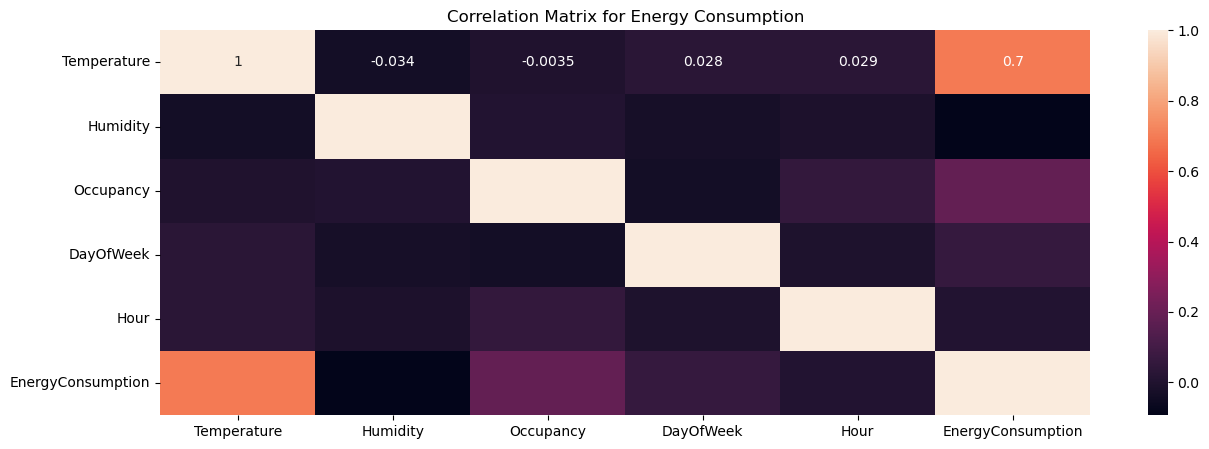

In [84]:
plt.figure(figsize=(15,5))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix for Energy Consumption')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

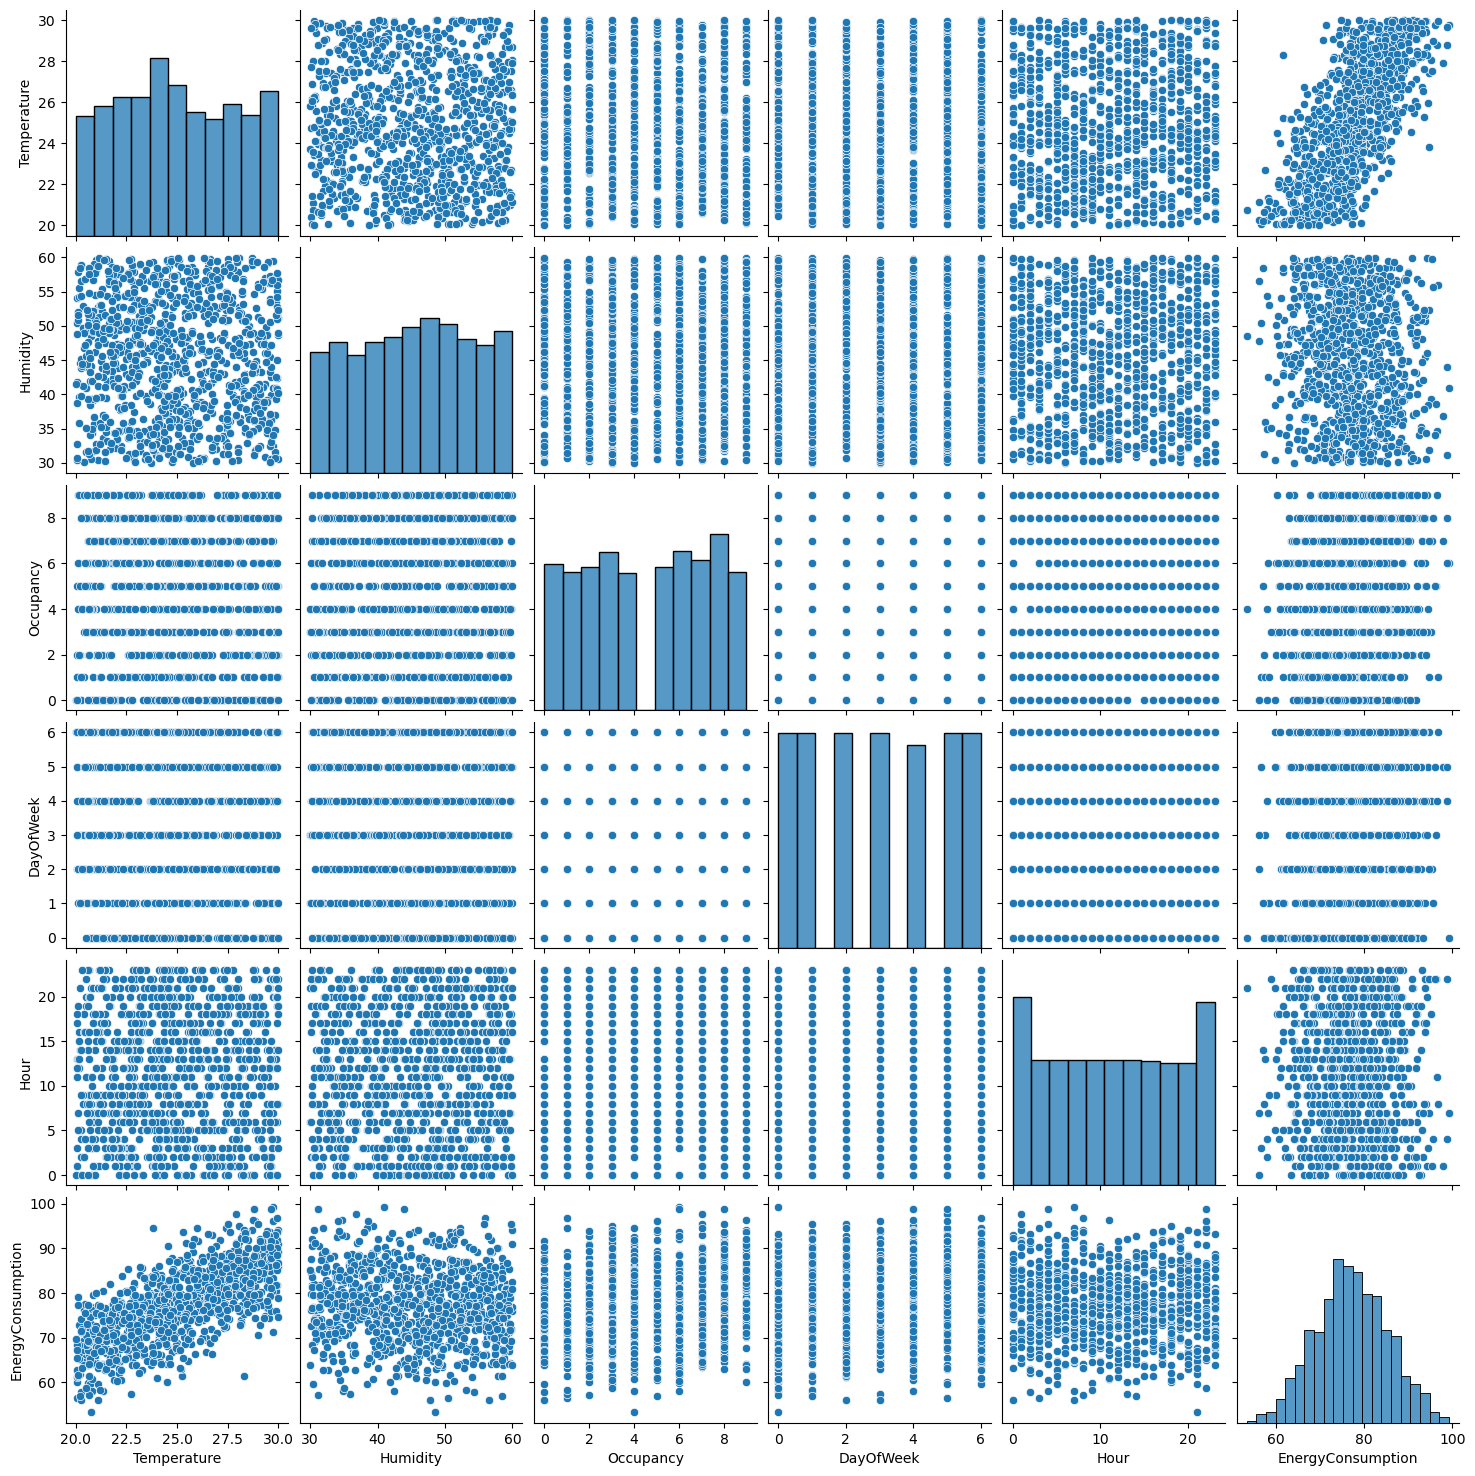

In [86]:
sns.pairplot(data[selected_features])
plt.show()    




## Feature Engineering


In [214]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [162]:
X=data[['Temperature','Humidity','Occupancy','HVACUsage','LightingUsage','RenewableEnergy','Holiday','Hour','Month']]
y=data['EnergyConsumption']

In [184]:
#Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [198]:
#Normalize features using standardscaler

scaler = StandardScaler

In [196]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [200]:
y_pred_linear = model.predict(X_test)

In [202]:
print(r2_score(y_test,y_pred_linear))

0.5968826438716195


In [204]:
print(mean_absolute_error(y_test,y_pred_linear))

4.068414981307955


In [206]:
print(mean_squared_error(y_test,y_pred_linear))

26.40413665216264


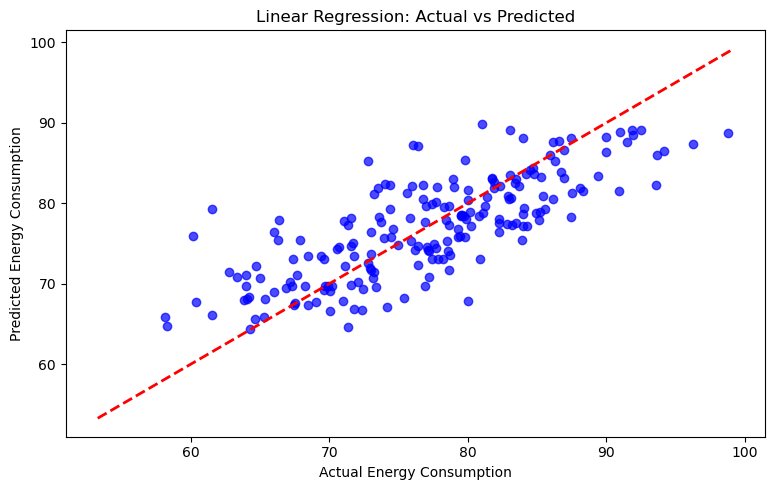

In [220]:
#Linear Regrission Predictions Plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred_linear, alpha=0.7, color='blue')
plt.plot([y.min(),y.max(),],[y.min(),y.max()],'r--', linewidth=2)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()

## RandomForestRegressor 

In [164]:
#Fit the model
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X,y)

RandomForestRegressor(random_state=42)

In [228]:
#Feature importance from the random forest model
importances = rf_model.feature_importances_
feature_names = X.columns

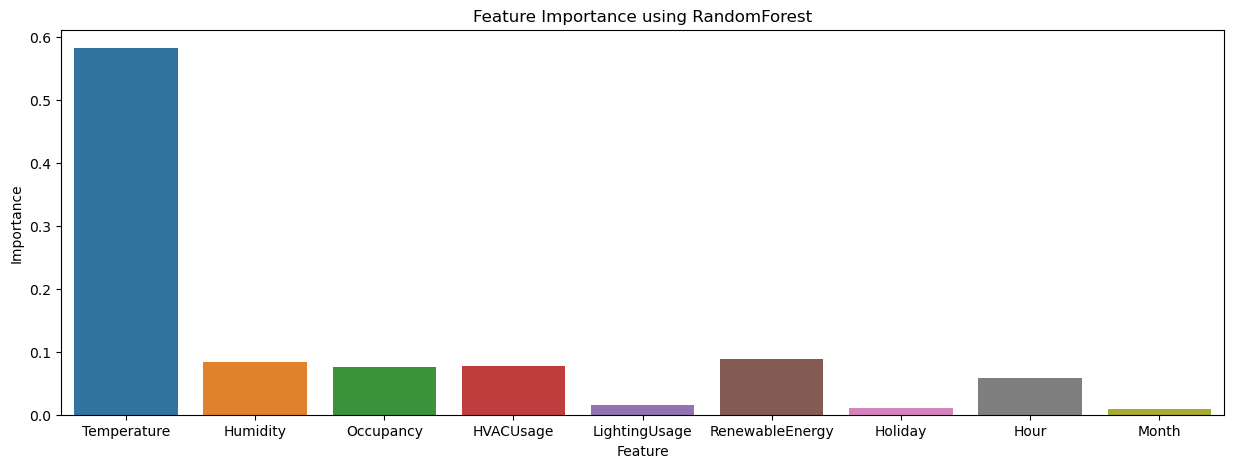

In [168]:
plt.figure(figsize=(15,5))
sns.barplot(x=feature_names, y=importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance using RandomForest')
plt.show()

In [170]:
#Print Feature importance

for name, importance in zip(feature_names,importances):
    print(f'{name}: {importance: .4f}')

Temperature:  0.5825
Humidity:  0.0837
Occupancy:  0.0752
HVACUsage:  0.0771
LightingUsage:  0.0148
RenewableEnergy:  0.0887
Holiday:  0.0102
Hour:  0.0581
Month:  0.0097


## Model Building with Hyperparameter Tuning

In [208]:
# define hyperparameter grid fro RandomForestRegressor

param_grid ={
    'n_estimators': [50,100,200],    #Number of trees
    'max_depth':[None,10,20,30],     #Maximum depth of tree
    'min_samples_split': [2,5,10],  #Minimum number of samples required to split an internal node
    'min_samples_leaf':[1,2,4],      #Minimum number of samples required to be at a leaf node
    'max_features': ['auto','sqrt','log2']   #Number of features to consider when looking for best split
}

In [210]:
#Initializing GridSearchCV with RandomForestRegressor

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,  
                           cv=5,   
                           n_jobs=-1,
                           verbose=2,
                           scoring='r2')
                           

In [212]:
#Fit the grid search to the data

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [133]:
#Dipslay the best paramters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R-squared score : { grid_search.best_score_}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best R-squared score : 0.5734804712661166


In [143]:
#Using best estimators from the grid search for predictions
best_rf_model = grid_search.best_estimator_

In [232]:
#Predict on the test data
y_pred_rf = best_rf_model.predict(X_test)

In [234]:
#Evaluating the random forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)

print(f'Random Forest Regressor - Mean Squared Error: {mse_rf: .2f}')
print(f'Random Forest Regressor - Mean Absolute Error: {mae_rf: .2f}')
print(f'Random Forest Regressor - R-squared: {r2_rf: .2f}')

Random Forest Regressor - Mean Squared Error:  29.40
Random Forest Regressor - Mean Absolute Error:  4.30
Random Forest Regressor - R-squared:  0.55


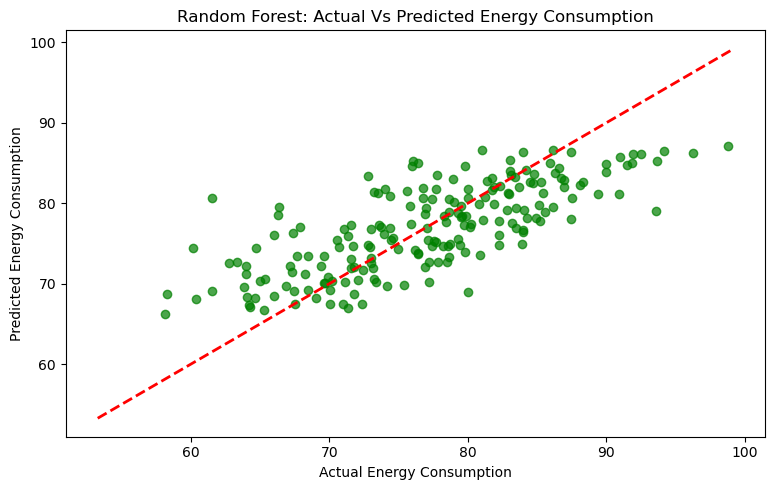

In [226]:
# Visualizing predicted vs actual energy consumption through random forest regressor
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.plot([y.min(),y.max()],[y.min(),y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Random Forest: Actual Vs Predicted Energy Consumption')
plt.tight_layout()
plt.show()

In [236]:
import joblib
#Train the model with the best parameters
best_rf = grid_search.best_estimator_
#Save the trained model to file
joblib.dump(best_rf, 'energypredcition.pkl')
print("Best RandomForestRegressor model saved successfully.")

Best RandomForestRegressor model saved successfully.
